In [ ]:
#!pip install basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
def plot_map_metric(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat_sst), urcrnrlat=np.max(lat_sst),
            llcrnrlon=np.min(lon_sst), urcrnrlon=np.max(lon_sst), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    #levels = np.linspace(0.0,1.0,21)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='Spectral')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1])
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name)
    


    plt.show()
    plt.clf()



In [2]:
import netCDF4 as nc
#tr Y_SST_ds=nc.Dataset("../Data/CMIP6-SST/GISS-E2-1-H_historical_1850_2014.nc")
trY_SST_ds=nc.Dataset("../Data/CMIP6-SST/MIROC6_historical_1850_2014.nc")

lat_sst=trY_SST_ds.variables['lat'][:]
lon_sst=trY_SST_ds.variables['lon'][:]

In [1]:
import xarray as xr
gen_ds_extend = xr.open_dataset('../Data/output/Observed/gen_extend_ds.nc')

obs_ds_extend = xr.open_dataset('../Data/output/MIROC6/obs_ds_extend.nc')

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
def plot_map(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat_sst), urcrnrlat=np.max(lat_sst),
            llcrnrlon=np.min(lon_sst), urcrnrlon=np.max(lon_sst), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    #levels = np.linspace(0.0,8,21)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='seismic')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1])
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name)
    


    plt.show()
    plt.clf()


plot_map(lon_sst,lat_sst,gen_ds_extend.std(dim=['years','mon'])['sst'].values,'../Data/output/MIROC_Observed/Std/gen_extend_std.png')

plot_map(lon_sst,lat_sst,obs_ds_extend.std(dim=['years','mon'])['sst'].values,'../Data/output/MIROC_Observed/Std/observed_extend_std.png')

In [7]:
gen_ds_extend.std(dim=['years','mon'])['sst']

<xarray.DataArray 'sst' (lat: 48, lon: 144)> Size: 28kB
array([[0.00588925, 0.01490925, 0.01528609, ..., 0.01722979, 0.01217497,
        0.01429244],
       [0.0096652 , 0.03142576, 0.03382094, ..., 0.03027404, 0.02370931,
        0.02436296],
       [0.01681714, 0.03989815, 0.03663825, ..., 0.04292833, 0.05161884,
        0.04385073],
       ...,
       [0.10092547, 0.536274  , 0.56092155, ..., 0.37624663, 0.3686951 ,
        0.45894507],
       [0.09928793, 0.55523485, 0.671623  , ..., 0.59330183, 0.6576092 ,
        0.6414594 ],
       [0.10000623, 0.5697095 , 0.5475025 , ..., 0.799425  , 0.811533  ,
        0.7757702 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 384B -88.12 -84.38 -80.62 ... 80.62 84.38 88.12
  * lon      (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8

In [13]:
len(list(zip(gen_ds_extend.lat.values,gen_ds_extend.lon.values)))

48

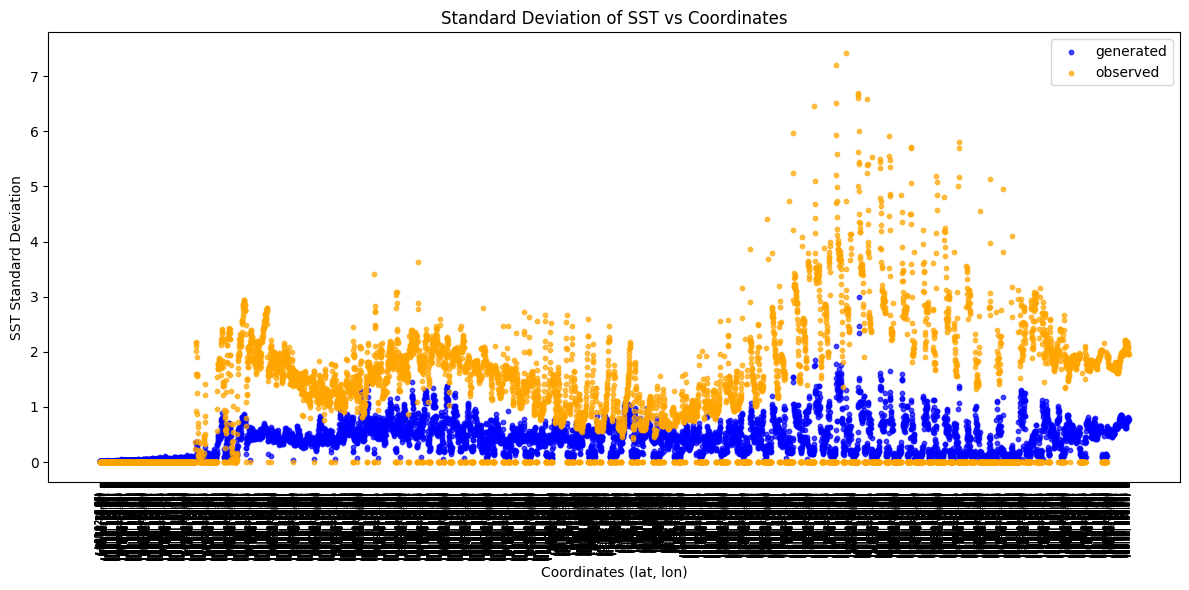

In [25]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Assume `ds` is your xarray dataset with dimensions (year, month, lat, lon)
# and `sst` is the data array.

# Step 1: Calculate the standard deviation of SST along the time dimensions (year and month)
sst_std_gen = gen_ds_extend['sst'].std(dim=['years', 'mon'])
sst_std_obs = obs_ds_extend['sst'].std(dim=['years', 'mon'])

# Step 2: Flatten the lat, lon, and std arrays
lats, lons = np.meshgrid(gen_ds_extend['lat'], gen_ds_extend['lon'], indexing='ij')
lats_flat = lats.flatten()
lons_flat = lons.flatten()
sst_std_flat_gen = sst_std_gen.values.flatten()
sst_std_flat_obs = sst_std_obs.values.flatten()

# Step 3: Create a combined coordinate string for the x-axis
coords_flat = [f"({lat:.2f}, {lon:.2f})" for lat, lon in zip(lats_flat, lons_flat)]

# Step 4: Plot the 2D scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(coords_flat, sst_std_flat_gen, c='blue', alpha=0.7, s=10,label='generated')
plt.scatter(coords_flat, sst_std_flat_obs, c='orange', alpha=0.7, s=10,label='observed')
plt.xticks(rotation=90, fontsize=6)  # Rotate x-axis labels for better readability
plt.xlabel('Coordinates (lat, lon)')
plt.ylabel('SST Standard Deviation')
plt.title('Standard Deviation of SST vs Coordinates')
plt.tight_layout()  # Adjust layout to fit x-axis labels
plt.legend()
plt.show()


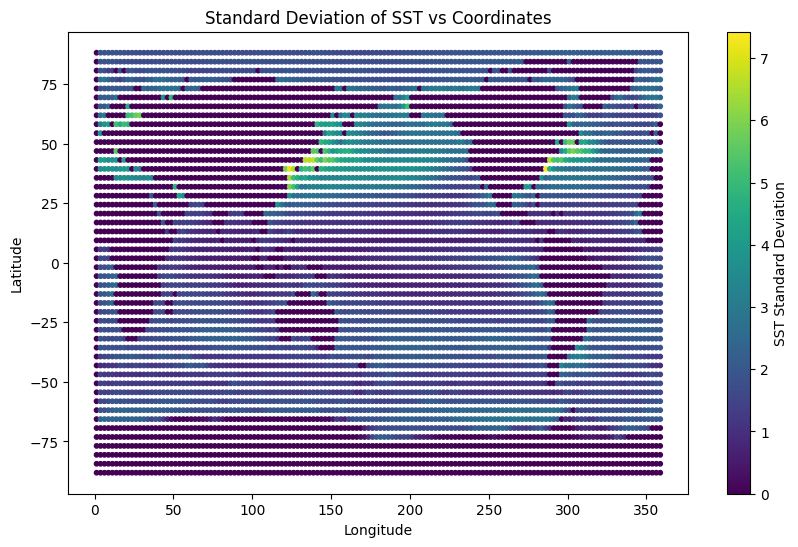

In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Assume `ds` is your xarray dataset with dimensions (year, month, lat, lon)
# and `sst` is the data array.

# Step 1: Calculate the standard deviation of SST along the time dimensions (year and month)
sst_std = obs_ds_extend['sst'].std(dim=['years', 'mon'])

# Step 2: Flatten the lat, lon, and std arrays for scatter plotting
lats, lons = np.meshgrid(obs_ds_extend['lat'], obs_ds_extend['lon'], indexing='ij')
lats_flat = lats.flatten()
lons_flat = lons.flatten()
sst_std_flat = sst_std.values.flatten()

# Step 3: Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(lons_flat, lats_flat, c=sst_std_flat, cmap='viridis', s=10)
plt.colorbar(scatter, label='SST Standard Deviation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Standard Deviation of SST vs Coordinates')
plt.show()


In [16]:
gen_ds_extend

<xarray.Dataset> Size: 166MB
Dimensions:  (years: 500, mon: 12, lat: 48, lon: 144)
Coordinates:
  * years    (years) int64 4kB 1871 1872 1873 1874 1875 ... 2367 2368 2369 2370
  * mon      (mon) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * lat      (lat) float64 384B -88.12 -84.38 -80.62 ... 80.62 84.38 88.12
  * lon      (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Data variables:
    sst      (years, mon, lat, lon) float32 166MB 0.08358 -0.01213 ... -0.2319

In [15]:
xr.plot.scatter(gen_ds_extend['sst'])

AttributeError: 'DataArray' object has no attribute 'data_vars'